In [180]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Exercice sur la création des noeuds

In [181]:
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,3),(1,3),(2,5),(3,6),(0,6),(6,5),(5,0),(3,4)])

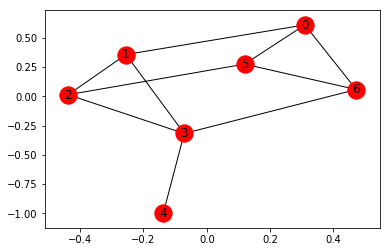

In [182]:
plt.figure()
nx.draw_networkx(G)

In [183]:
trans_nodes = pd.read_csv('data/transport-nodes.csv')
trans_nodes

,id,latitude,longitude,population
0,Amsterdam,52.379189,4.899431,821752
1,Utrecht,52.092876,5.104480,334176
2,Den Haag,52.078663,4.288788,514861
3,Immingham,53.612390,-0.222190,9642
4,Doncaster,53.522850,-1.131160,302400
5,Hoek van Holland,51.977500,4.133330,9382
6,Felixstowe,51.963750,1.351100,23689
7,Ipswich,52.059170,1.155450,133384
8,Colchester,51.889210,0.904210,104390
9,London,51.509865,-0.118092,8787892


In [184]:
trans_arcs = pd.read_csv('data/transport-relationships.csv')
trans_arcs

,src,dst,relationship,cost
0,Amsterdam,Utrecht,EROAD,46
1,Amsterdam,Den Haag,EROAD,59
2,Den Haag,Rotterdam,EROAD,26
3,Amsterdam,Immingham,EROAD,369
4,Immingham,Doncaster,EROAD,74
5,Doncaster,London,EROAD,277
6,Hoek van Holland,Den Haag,EROAD,27
7,Felixstowe,Hoek van Holland,EROAD,207
8,Ipswich,Felixstowe,EROAD,22
9,Colchester,Ipswich,EROAD,32


In [185]:
G1 = nx.from_pandas_edgelist(trans_arcs, 'src' ,'dst',['relationship','cost'])

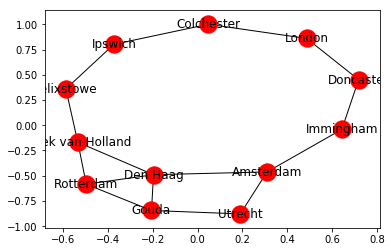

In [186]:
plt.figure()
nx.draw_networkx(G1) # 'with_labels=False' comme deuxième entrée pour cacher les titres

In [187]:
G1.node['Gouda']

{}

In [188]:
def ajouterAttribut(myGraphe,dfnoeuds, nomAttribut,nomIndex):
    for i in range(dfnoeuds.count().id):
        ville = dfnoeuds.id[i]
        val_attr = dfnoeuds[dfnoeuds[nomIndex] == ville][nomAttribut]
        myGraphe.add_node(ville, **{nomAttribut : val_attr[i]})   

In [189]:
ajouterAttribut(G1,trans_nodes, 'latitude','id')
ajouterAttribut(G1,trans_nodes, 'longitude','id')
ajouterAttribut(G1,trans_nodes, 'population','id')

In [190]:
G1.node.items()

[('Gouda', {'latitude': 52.01667, 'longitude': 4.70833, 'population': 70939}),
 ('Immingham',
  {'latitude': 53.612390000000005, 'longitude': -0.22219, 'population': 9642}),
 ('Felixstowe',
  {'latitude': 51.96375, 'longitude': 1.3511, 'population': 23689}),
 ('Hoek van Holland',
  {'latitude': 51.9775, 'longitude': 4.13333, 'population': 9382}),
 ('London',
  {'latitude': 51.509865000000005,
   'longitude': -0.118092,
   'population': 8787892}),
 ('Utrecht',
  {'latitude': 52.092876000000004,
   'longitude': 5.104480000000001,
   'population': 334176}),
 ('Ipswich',
  {'latitude': 52.05917, 'longitude': 1.15545, 'population': 133384}),
 ('Amsterdam',
  {'latitude': 52.379189000000004,
   'longitude': 4.899431,
   'population': 821752}),
 ('Doncaster',
  {'latitude': 53.52285, 'longitude': -1.13116, 'population': 302400}),
 ('Rotterdam',
  {'latitude': 51.9225, 'longitude': 4.47917, 'population': 623652}),
 ('Colchester',
  {'latitude': 51.88921,
   'longitude': 0.9042100000000001,
   

In [191]:
G1.edges.items()

[(('Gouda', 'Rotterdam'), {'cost': 25L, 'relationship': 'EROAD'}),
 (('Gouda', 'Utrecht'), {'cost': 35L, 'relationship': 'EROAD'}),
 (('Gouda', 'Den Haag'), {'cost': 32L, 'relationship': 'EROAD'}),
 (('Immingham', 'Amsterdam'), {'cost': 369L, 'relationship': 'EROAD'}),
 (('Immingham', 'Doncaster'), {'cost': 74L, 'relationship': 'EROAD'}),
 (('Felixstowe', 'Ipswich'), {'cost': 22L, 'relationship': 'EROAD'}),
 (('Felixstowe', 'Hoek van Holland'), {'cost': 207L, 'relationship': 'EROAD'}),
 (('Hoek van Holland', 'Rotterdam'), {'cost': 33L, 'relationship': 'EROAD'}),
 (('Hoek van Holland', 'Den Haag'), {'cost': 27L, 'relationship': 'EROAD'}),
 (('London', 'Doncaster'), {'cost': 277L, 'relationship': 'EROAD'}),
 (('London', 'Colchester'), {'cost': 106L, 'relationship': 'EROAD'}),
 (('Utrecht', 'Amsterdam'), {'cost': 46L, 'relationship': 'EROAD'}),
 (('Ipswich', 'Colchester'), {'cost': 32L, 'relationship': 'EROAD'}),
 (('Amsterdam', 'Den Haag'), {'cost': 59L, 'relationship': 'EROAD'}),
 (('Ro



# Affichage de la carte

In [192]:
import folium
'''
On construit le Map avec une location par defaut
'''
basemap = folium.Map(
    location=[52.3791890, 4.899431],
    tiles='Stamen Toner',
    zoom_start=12,
    
)


In [193]:
basemap

In [194]:
G1.node.items()[0][1]['latitude']

52.01667

In [195]:
for i in G1.node.items():
    folium.Marker(
        location=[i[1]['latitude'],i[1]['longitude']],
        popup='Population '+str(i[1]['population']),
    ).add_to(basemap)
basemap.zoom_start = 6
basemap

In [196]:
def construirePointsImage(myGraphe):
    points = []
    for i in myGraphe.node.items():
        for neighbor in list(myGraphe.neighbors(i[0])):
            S = []
            S.append([i[1]["latitude"],i[1]["longitude"]])
            S.append([myGraphe.node[neighbor]["latitude"],myGraphe.node[neighbor]["longitude"]])
            points.append(S)
    return points

In [197]:
coordonneesvoisins = construirePointsImage(G1)
coordonneesvoisins[0]

[[52.01667, 4.70833], [51.9225, 4.47917]]

In [198]:
folium.PolyLine(coordonneesvoisins, color="red", weight=2.5, opacity=1).add_to(basemap)
basemap

In [199]:
class Noeud:
    def __init__(self,name):
        self.name = name
        self.attributs = {}
        self.listeNomVoisin = []
        
    def setAttribut(self,key, values):
        self.attributs[key] = values
        
    def getAttribut(self,key):
        return self.attributs[key]
    
    def getName(self):
        return self.name
    
    def setVoisins(self, myGraphe):
        try:
            self.listeNomVoisin = list(myGraphe.neighbors(self.name))
        except:
            pass
        
    def getVoisins(self):
        return self.listeNomVoisin
    '''
    Deux noeuds sont egaux s'ils ont même name
    '''
    def egal(self, noeud):
        pass

n = Noeud('Gouda')
n.setVoisins(G1)
n.getVoisins()

['Rotterdam', 'Utrecht', 'Den Haag']

In [200]:
import csv
class Graphe:
    '''
    Les noeuds seront mis dans une liste
    Les arcs forment un dictionnaire avec comme clé les noms des noeuds et comme valeurs une liste de noeud
    '''
    def __init__(self):
        self.noeuds = []
        self.arcs = {}
    
    
    def creerNoeuds(self,fichiernoeuds):
        with open(fichiernoeuds, 'r') as file:
            nodes_file = csv.reader(file)
            E = list(nodes_file)
            del E[0]
            self.noeuds = E
#             return E
        

    def creerArc(self, fichierarcs):
        with open(fichierarcs, 'r') as file:
            arcs_file = csv.reader(file)
            self.arcs = list(arcs_file)
    
    
    
    def getNoeud(self,name):
        n = np.array(self.noeuds)
        return n[np.where(n[:,0] == name)]
    
    
    
    def getVoisins(self,noeud):
        D = self.arcs
        D = np.delete(D, (2,3), 1)
        D = np.delete(D, 0, 0)

        voisins1 = [D[i,1] for i in range(D.shape[0]) if D[i,0]==noeud]
        voisins2 = [D[i,0] for i in range(D.shape[0]) if D[i,1]==noeud]
        voisins = voisins1 + voisins2
        return voisins
    
    
    
    def getCoordonnesVoisins(self, noeud):
        voisins = self.getVoisins(noeud)
        listecoord = tuple((self.getNoeud(voisin) for voisin in voisins))
        listecoord = np.concatenate(listecoord, axis=0)
        listecoord = np.delete(listecoord, (0,3), 1)
        listecoord = listecoord.tolist()
        listecoord = [[float(i) for i in x] for x in listecoord]
        return listecoord
        
    
    '''
    Recuperer les coordonnees d'une liste de neouds pour visualiser sous folium
    Prend en entrée une liste de nom de noeud
    Retourne une liste de sous-listes à deux elements de coordonnées
    '''
    def getListeCoordonnees(self,listeNoeuds):
        coord = tuple((np.delete(self.getNoeud(name), (0,3), 1) for name in listeNoeuds))
        coord = np.concatenate(coord, axis=0)
        coord = coord.tolist()
        coord = [[float(i) for i in x] for x in coord]
        return coord
    
    '''
    Visualiser les noeuds et les arcs sous folium
    Entree: le parametre explored sera utilisé pour les parcours de graphe
    '''
    
    def visualiserFolium(self, locationpardefaut = [52.3791890, 4.899431],tiles='Stamen Toner',explored = None ):
    
        basemap = folium.Map(location= locationpardefaut,zoom_start=6,tiles=tiles)
        
        for i in self.noeuds:
            folium.Marker(
                location=[float(i[1]),float(i[2])],
                popup='Population '+str(i[3]),
            ).add_to(basemap)
            
            locations = self.getCoordonnesVoisins(i[0])
            if len(locations)!= 0:
                folium.PolyLine(locations, color="red", weight=2.5, opacity=1).add_to(basemap)
        if explored != None:
            folium.PolyLine(self.getListeCoordonnees(explored), color="green", weight=2.5, opacity=1).add_to(basemap)
        return basemap

In [201]:
G2 = Graphe()
G2.creerNoeuds('data/transport-nodes.csv')
G2.creerArc('data/transport-relationships.csv')

In [202]:
G2.getNoeud('Amsterdam')

array([['Amsterdam', '52.379189', '4.899431', '821752']], dtype='|S16')

In [203]:
G2.getVoisins('Amsterdam')

['Utrecht', 'Den Haag', 'Immingham']

In [204]:
G2.getCoordonnesVoisins('Amsterdam')

[[52.092876, 5.10448], [52.078663, 4.288788], [53.61239, -0.22219]]

In [205]:
G2.getListeCoordonnees(['Amsterdam','London'])

[[52.379189, 4.899431], [51.509865, -0.118092]]

In [206]:
G2.creerNoeuds('data/transport-nodes.csv')

In [207]:
G2.visualiserFolium()

In [208]:
class Pile():
    '''
    Classe Pile: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les consultations, les insertions, les suppressions se font du même cote
    Dernier arrive premier servi : LIFO
    '''
    def __init__(self):
        self.elements = []
    '''
    Insere un objet en tete de la pile
    '''
    def push(self,noeud):
        self.elements.append(noeud)
    '''
    Retourne True si  un noeud est dans la pile
    '''
    
    def contains_noeud(self, name):
        return name in self.elements
                
    '''
    Retourne true si la pile est vide
    '''
    def empty(self):
        return len(self.elements) == 0

    '''
    Affiche le contenu de la pile
    '''
    def display(self):
        return self.elements
    
    '''
    Retourne et supprime l'element en tete de pile
    Retourne une exception si la pile est vide
    '''
    def remove(self):
        if self.empty():
            raise Exception("Empty Pile.")
        else:
            tete_de_pile = self.elements[-1]
            self.elements.pop()
            return tete_de_pile

In [209]:

class File(Pile):
    '''
    Classe File: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les éléments sont enfilés (insérés) du coté arrière et défilés (retirés)
    du coté avant
    Premier arrive premier servi : FIFO
    File et Pile peuvent partager certaines methodes donc utilisez l'heritage pour definir
    la classe File. 
    Normalement vous ne devez changer l'implementation d'une seule methode
    '''

    def remove(self):
        if self.empty():
            raise Exception("Empty Pile.")
        else:
            tete_de_pile = self.elements[0]
            self.elements.pop(0)
            return tete_de_pile
        

In [210]:
'''
Implémenter le parcours en profondeur non recursif entre deux noeuds
Prend en parametre:
- un graphe
- un noeud source
- un noeud destination
Output:
une liste contenant les noms des noeuds explorés pour aller du noeud source vers le noeud destination 
Vous completerez certaines parties du code
'''

def parcoursDFS(myGraphe,noeudSRC,noeudDST):
        """Trouver un parcours DFS entre noeudSRC et noeudDST"""

        # Le nombre de noeuds explorés
        num_explored = 0

        # Initialisation de la frontiere avec le noeud source
        
        frontiere = File()
        frontiere.push(noeudSRC)
        for x in myGraphe.getVoisins(noeudSRC):
            frontiere.push(x)

        # Initialisation de la liste des noeuds explorés
        explored = Pile()

        # On boucle jusuq'à trouver la solution
        while True:

            # S'il n'y a aucun noeud dans la frontiére alors pas de solution
            if frontiere.empty():
                raise Exception("no solution")

            # Choisir un node dans la frontiere
            node = None
            num_explored += 1

            # Si ce noeud est le noeud destination
            if node.egal(noeudDST):
                
                # Ajouter le aux noeuds deja explorés
                explored.add(noeudDST.name)
                
                return explored, num_explored

            # Marquer le noeud comme explore
            explored......

            # Ajouter tous les voisins du noeud à la frontiere
            for n in myGraphe.getVoisins(node):
                
                if not frontiere.contains_noeud(n[0]) and n[0] not in explored:
                    
                    frontiere...................



SyntaxError: invalid syntax (<ipython-input-210-2038af13cd3b>, line 48)